## Aprendizaje Automático Supervisado

## 3º GrIA, USC

# Práctica 1: Árboles de Decisión y Selección de Modelos

Este fichero Notebook contiene la solución del siguiente equipo al guion de prácticas proporcionado en el Aula Virtual de la asignatura.

Miembros del equipo:
- _Estudiante1_: Mateo, Fraguas Abal
- _Estudiante2_: Álvaro, Garnelo Luaces

# 1. Instalación de Paquetes

Escribe en la siguiente celda de código las instrucciones necesarias para cargar los paquetes de Python que necesitéis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

Además, para garantizar la reproducibilidad de resultados vamos a fijar una semilla que se use con todos los algoritmos que tengan alguna componente no determinista (**no cambies el código de la siguiente celda**).

In [2]:
# Definir semilla
SEMILLA = 1492
np.random.seed(SEMILLA)

# 2. Carga de Datos

Escribe en la siguiente celda de código las instrucciones necesarias para cargar los conjuntos de datos (ficheros csv) proporcionados en el Aula Virtual. Para el pre-procesado y análisis de los datos podéis añadir las celdas que necesitéis.

In [3]:
df1 = pd.read_csv("data/breast-cancer-train.csv")
df2 = pd.read_csv("data/adult-train.csv")


In [4]:
df1

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
3,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
4,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.17910,0.52490,0.5355,0.1741,0.3985,0.12440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418,925311,B,11.20,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.00000,...,11.92,38.30,75.19,439.6,0.09267,0.05494,0.0000,0.0000,0.1566,0.05905
419,926125,M,20.92,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.14740,...,24.29,29.41,179.10,1819.0,0.14070,0.41860,0.6599,0.2542,0.2929,0.09873
420,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.45,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
421,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.98,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820


In [5]:
df2

,age,workclass,fnlwgt,education,educationNum,maritalStatus,occupation,relationship,race,sex,capitalGain,capitalLoss,hoursPerWeek,nativeCountry,outputClass
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


## Pre-procesado

#### Eliminación de duplicados

In [6]:
print(df1.duplicated().sum()); print(df2.duplicated().sum()) #Cuantos datos duplicados


4
24


In [7]:
df1 = df1.drop_duplicates() #Eliminacion de duplicados
df2 = df2.drop_duplicates()

In [8]:
print(df1.duplicated().sum()); print(df2.duplicated().sum()) #Cuantos datos duplicados


0
0


### Substitución de valores categóricos por numéricos

In [9]:
#veo que clase es la mayoritaria y creo X e y
X1 = df1.drop(columns=['id', 'diagnosis']) 
y1 = df1['diagnosis'].map({'M': 0, 'B': 1})

X2 = df2.drop(columns=['outputClass']) 
y2 = df2['outputClass'].map({'<=50K': 1, '>50K': 0})

In [10]:
print(y1.value_counts())
print(y2.value_counts())

diagnosis
1    282
0    137
Name: count, dtype: int64
outputClass
1    24698
0     7839
Name: count, dtype: int64


### Gestión de datos faltantes

In [11]:
pd.isna(df1).sum() #muestra cuantos MVs tiene cada parámetro

id                          0
diagnosis                   0
radius_mean                 0
texture_mean                0
perimeter_mean              0
area_mean                   0
smoothness_mean             0
compactness_mean            0
concavity_mean              0
concave_points_mean         0
symmetry_mean               0
fractal_dimension_mean      0
radius_sd                  42
texture_sd                 37
perimeter_sd               30
area_sd                    39
smoothness_sd              35
compactness_sd             22
concavity_sd               12
concave_points_sd          13
symmetry_sd                13
fractal_dimension_sd       16
radius_worst                0
texture_worst               0
perimeter_worst             0
area_worst                  0
smoothness_worst            0
compactness_worst           0
concavity_worst             0
concave_points_worst        0
symmetry_worst              0
fractal_dimension_worst     0
dtype: int64

In [12]:
#IMPUTACION USANDO LA MEDIA
imputer = SimpleImputer(strategy='mean')
df_imputed_array = imputer.fit_transform(X1)
X1_mean = pd.DataFrame(df_imputed_array, columns=X1.columns)

#IMPUTACION USANDO LA MEDIANA
imputer = SimpleImputer(strategy='median')
df_imputed_array = imputer.fit_transform(X1)
X1_median = pd.DataFrame(df_imputed_array, columns=X1.columns)

#IMPUTACION MEDIANTE LOS KVECINOS
knn_imputer = KNNImputer(n_neighbors=5)
df_knn_array = knn_imputer.fit_transform(X1)
X1_knn = pd.DataFrame(df_knn_array, columns=X1.columns)

In [13]:
pd.isna(df2).sum() #muestra cuantos MVs tiene cada parámetro

age                 0
workclass        1836
fnlwgt              0
education           0
educationNum        0
maritalStatus       0
occupation       1843
relationship        0
race                0
sex                 0
capitalGain         0
capitalLoss         0
hoursPerWeek        0
nativeCountry     582
outputClass         0
dtype: int64

In [14]:
#ELIMINO LAS COLUMNAS CON MAS DE 500 NaN
X2 = X2.drop(columns=['workclass', 'occupation', "nativeCountry"])
pd.isna(X2).sum().sum() 


np.int64(0)

In [15]:
from sklearn.preprocessing import LabelEncoder

# Identificar columnas categóricas y numéricas
le = LabelEncoder()
categories = X2.select_dtypes(include=['object']).columns
for col in categories:
    X2[col] = le.fit_transform(X2[col])
print("\nPrimeras 5 filas de datos de Adult tras label encoding:")
print(X2.head())


Primeras 5 filas de datos de Adult tras label encoding:
   age  fnlwgt  education  educationNum  maritalStatus  relationship  race  \
0   39   77516          9            13              4             1     4   
1   50   83311          9            13              2             0     4   
2   38  215646         11             9              0             1     4   
3   53  234721          1             7              2             0     2   
4   28  338409          9            13              2             5     2   

   sex  capitalGain  capitalLoss  hoursPerWeek  
0    1         2174            0            40  
1    1            0            0            13  
2    1            0            0            40  
3    1            0            0            40  
4    0            0            0            40  


In [16]:
#NORMALIZACION
scaler = MinMaxScaler()
X1_norm_mean = scaler.fit_transform(X1_mean)
X1_norm_median = scaler.fit_transform(X1_median)
X1_norm_knn = scaler.fit_transform(X1_knn)
X2_norm = scaler.fit_transform(X2)

# 3. Creación y Validación de Modelos

Escribe en la siguiente celda de código las instrucciones necesarias para crear, validar y seleccionar los modelos aprendidos a partir de los datos tratados en la sección anterior. Podéis añadir las celdas que necesitéis.

In [17]:
#DIVISION SIMPLE
X1_train_mean, X1_test_mean, y1_train_mean, y1_test_mean = train_test_split(
    X1_norm_mean, y1, test_size=0.2, stratify=y1, random_state=SEMILLA
)
X1_train_median, X1_test_median, y1_train_median, y1_test_median = train_test_split(
    X1_norm_median, y1, test_size=0.2, stratify=y1, random_state=SEMILLA
)
X1_train_KNN, X1_test_KNN, y1_train_KNN, y1_test_KNN = train_test_split(
    X1_norm_knn, y1, test_size=0.2, stratify=y1, random_state=SEMILLA
)

In [18]:
estrategia_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=SEMILLA)

In [19]:
#KNN


from matplotlib.pyplot import grid


def KNN_modelo(X_train, y_train, X_test, y_test, tipo, param_grid_knn):
    knn = KNeighborsClassifier()



    cv = StratifiedKFold(n_splits=10, shuffle=True, random_state = 1492)
    grid = GridSearchCV(estimator=knn,param_grid=param_grid_knn,cv=cv,scoring='accuracy')

    # Entrenar
    grid.fit(X_train, y_train)
    # Resultados del GridSearch
    results_df = pd.DataFrame(grid.cv_results_)

    mejor_resultado = grid.best_score_
    desviacion = results_df.loc[grid.best_index_, 'std_test_score']
    threshold = mejor_resultado - desviacion

    # Los modelos que cumplen la Regla 1-std
    candidatos = results_df[results_df['mean_test_score'] >= threshold]
    candidatos_ordenados = candidatos.sort_values(by=['param_n_neighbors', 'param_weights'])
    # Elijo el primero (el de menor k)
    simple_knn_model = candidatos_ordenados.iloc[0]
    
    # Mejor K
    print("Imputer:", tipo)

    k_simple = int(simple_knn_model['param_n_neighbors'])
    peso_simple = simple_knn_model['param_weights']
    accuracy_simple = simple_knn_model['mean_test_score']
    print(f"Modelo con menor error CV: k={grid.best_params_['n_neighbors']}, weights='{grid.best_params_['weights']}',\nAccuracy de entrenamiento: {mejor_resultado:.4f}, Desviación: {desviacion:.4f}")
    print(f"Mejor modelo según Regla 1-std: k={k_simple}, weights='{peso_simple}',\nAccuracy de entrenamiento: {accuracy_simple:.4f}")
    # Evaluar en X_test
    y_pred = grid.predict(X_test)
    print("Accuracy de test:", accuracy_score(y_test, y_pred))

    for w in param_grid_knn['weights']:
        puntos = [1 - grid.cv_results_['mean_test_score'][i] for i, params in enumerate(grid.cv_results_['params']) if params['weights'] == w]
        plt.plot(param_grid_knn['n_neighbors'], puntos, marker='o')
        plt.axhline(1 - threshold, color='red', linestyle='--', label=f'Threshold (1-std): {threshold:.4f}')
    plt.grid(True)
    plt.show()
    


In [20]:
param_grid_knn = {
    'n_neighbors': list(range(1, 20, 2)),
    'weights' : ['uniform','distance']
}

Imputer: mean
Modelo con menor error CV: k=3, weights='uniform',
Accuracy de entrenamiento: 0.9851, Desviación: 0.0149
Mejor modelo según Regla 1-std: k=3, weights='distance',
Accuracy de entrenamiento: 0.9851
Accuracy de test: 0.9404761904761905


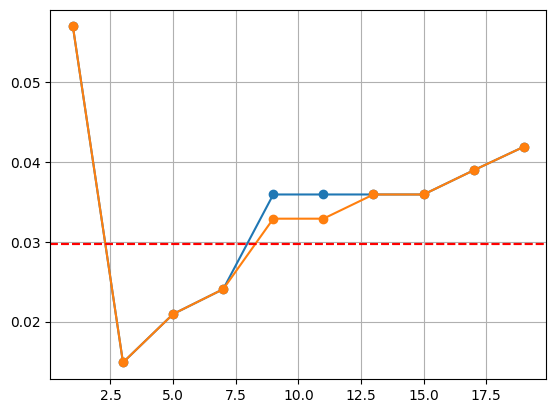

Imputer: median
Modelo con menor error CV: k=3, weights='uniform',
Accuracy de entrenamiento: 0.9851, Desviación: 0.0149
Mejor modelo según Regla 1-std: k=3, weights='distance',
Accuracy de entrenamiento: 0.9851
Accuracy de test: 0.9404761904761905


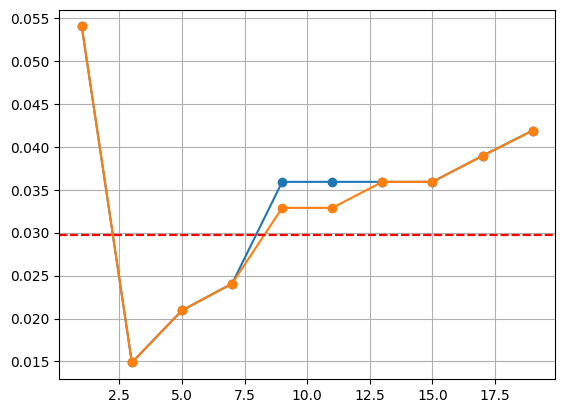

Imputer: knn
Modelo con menor error CV: k=3, weights='uniform',
Accuracy de entrenamiento: 0.9821, Desviación: 0.0146
Mejor modelo según Regla 1-std: k=3, weights='distance',
Accuracy de entrenamiento: 0.9821
Accuracy de test: 0.9404761904761905


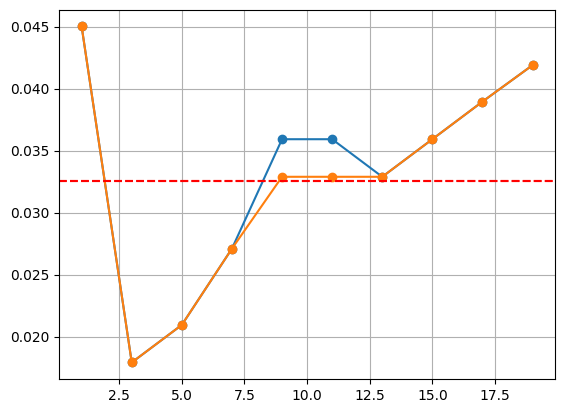

In [21]:
KNN_modelo(X1_train_mean, y1_train_mean, X1_test_mean, y1_test_mean, 'mean', param_grid_knn)
KNN_modelo(X1_train_median, y1_train_median, X1_test_median, y1_test_median, 'median', param_grid_knn)
KNN_modelo(X1_train_KNN, y1_train_KNN, X1_test_KNN, y1_test_KNN, 'knn', param_grid_knn)

## Resultados KNN

Las diferecias en los resultados entre los datasets en los que utilizamos diferentes imputers son nulas en este caso.  
En este caso el mejor modelo y el que seleccionamos con la regla 1-desviación es el mismo.
- Mejor modelo:
>  k=3, weights='uniform'

In [22]:
def DT_modelo(X_train, y_train, X_test, y_test, tipo):
    dt = DecisionTreeClassifier(criterion='entropy', random_state=SEMILLA)
    param_grid_dt = {
        'max_depth': list(range(1, 11)),
        'min_samples_split': list(range(2, 11))
    }

    grid_dt = GridSearchCV(estimator=dt, param_grid=param_grid_dt, cv=estrategia_cv, scoring='accuracy')
    grid_dt.fit(X_train, y_train)

    resultados_dt = pd.DataFrame(grid_dt.cv_results_)
    scores = np.array(resultados_dt['mean_test_score']).reshape(len(param_grid_dt['max_depth']), len(param_grid_dt['min_samples_split']))

    plt.figure(figsize=(10, 8))
    ax = sns.heatmap(scores, annot=True, cmap='viridis',
                    xticklabels=param_grid_dt['min_samples_split'],
                    yticklabels=param_grid_dt['max_depth'])
    plt.xlabel('min_samples_split')
    plt.ylabel('max_depth')
    plt.title(f'Heatmap de Accuracy para Árbol de Decisión ({tipo})')

    # Añadir visualización del threshold (línea horizontal)
    best_score_dt = grid_dt.best_score_
    std_dev_dt = resultados_dt.loc[grid_dt.best_index_, 'std_test_score']
    threshold_dt = best_score_dt - std_dev_dt

    # Encuentra la(s) fila(s) donde el accuracy supera el threshold
    for i, max_depth in enumerate(param_grid_dt['max_depth']):
        for j, min_samples_split in enumerate(param_grid_dt['min_samples_split']):
            if scores[i, j] >= threshold_dt:
                ax.add_patch(plt.Rectangle((j, i), 1, 1, fill=False, edgecolor='red', lw=2))

    plt.show()

    # Aplicación de la regla de 1 desviación estándar
    simple_dt_candidates = resultados_dt[resultados_dt['mean_test_score'] >= threshold_dt]
    simple_dt_model = simple_dt_candidates.sort_values(by=['param_max_depth', 'param_min_samples_split']).iloc[0]

    print(f"Mejor modelo Árbol según Accuracy: max_depth={grid_dt.best_params_['max_depth']}, min_samples_split={grid_dt.best_params_['min_samples_split']}, \nAccuracy={best_score_dt:.4f}, Desviación: {std_dev_dt:.4f}")
    print(f"Mejor modelo Árbol según Regla 1-std: max_depth={int(simple_dt_model['param_max_depth'])}, min_samples_split={int(simple_dt_model['param_min_samples_split'])}, \nAccuracy={simple_dt_model['mean_test_score']:.4f}")
    # Evaluar en X_test
    y_pred = grid_dt.predict(X_test)
    print("Accuracy de test:", accuracy_score(y_test, y_pred))


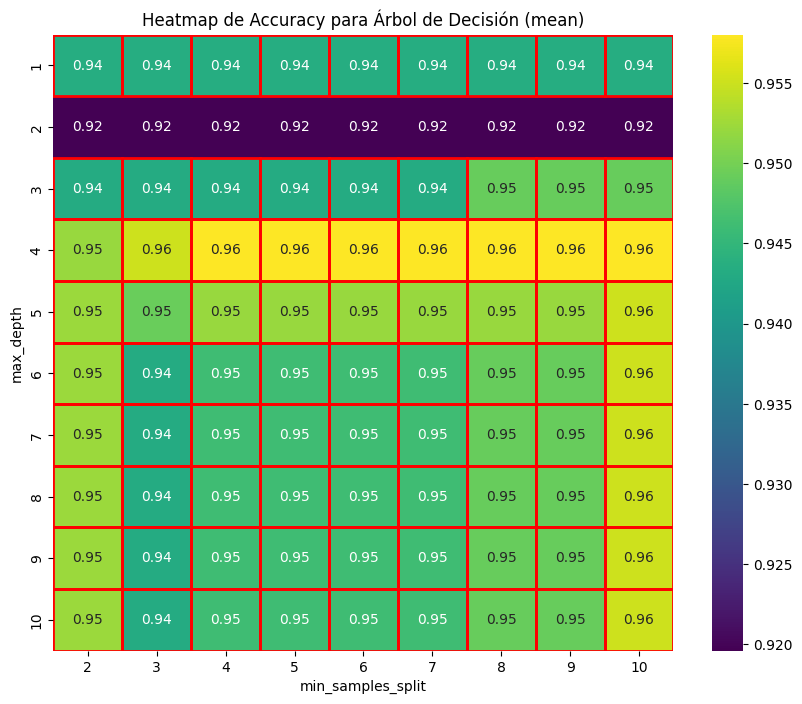

Mejor modelo Árbol según Accuracy: max_depth=4, min_samples_split=4, 
Accuracy=0.9580, Desviación: 0.0333
Mejor modelo Árbol según Regla 1-std: max_depth=1, min_samples_split=2, 
Accuracy=0.9434
Accuracy de test: 0.8928571428571429


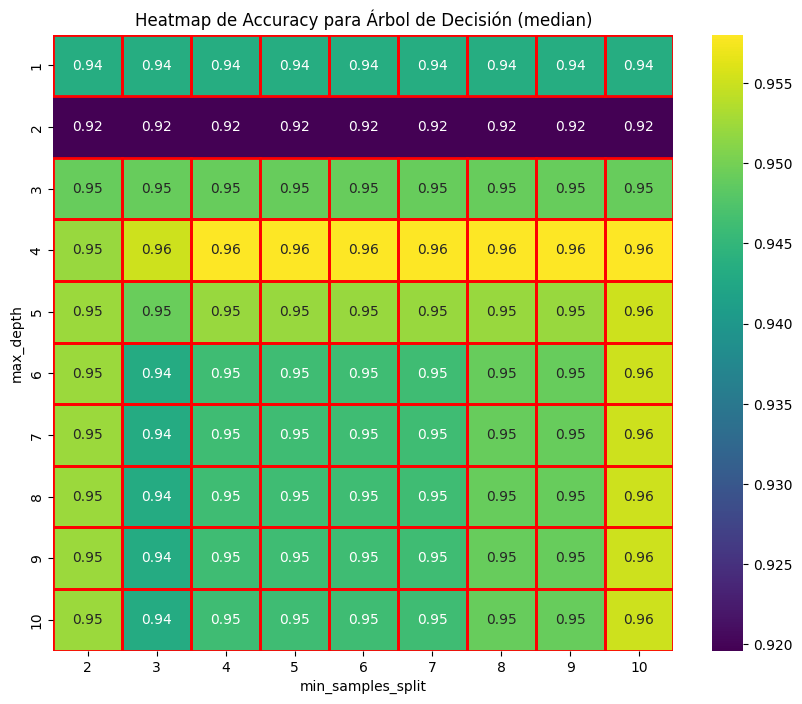

Mejor modelo Árbol según Accuracy: max_depth=4, min_samples_split=4, 
Accuracy=0.9580, Desviación: 0.0333
Mejor modelo Árbol según Regla 1-std: max_depth=1, min_samples_split=2, 
Accuracy=0.9434
Accuracy de test: 0.8928571428571429


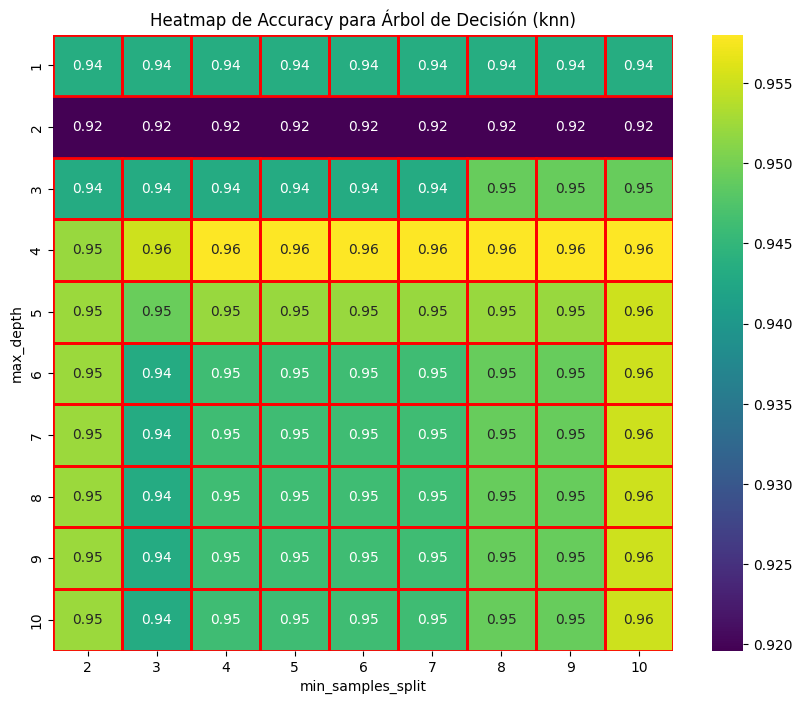

Mejor modelo Árbol según Accuracy: max_depth=4, min_samples_split=4, 
Accuracy=0.9580, Desviación: 0.0333
Mejor modelo Árbol según Regla 1-std: max_depth=1, min_samples_split=2, 
Accuracy=0.9434
Accuracy de test: 0.8928571428571429


In [23]:
DT_modelo(X1_train_mean, y1_train_mean, X1_test_mean, y1_test_mean, 'mean')
DT_modelo(X1_train_median, y1_train_median, X1_test_median, y1_test_median, 'median')
DT_modelo(X1_train_KNN, y1_train_KNN, X1_test_KNN, y1_test_KNN, 'knn')

## Modelo Decision Tree:

Aqui también resulta indiferente el imputer utilizado, para el test final utilizaremos el dataset generado con SimpleImputer: 'mean'.  
En este caso el 'mejor' resultado y el que seleccionaremos son diferentes.
- Modelo Seleccionado:
>  max_depth=1, min_samples_split=2



## Modelo final Breast Cancer
Seleccionamos el modelo de KNN con los parámetros k = 3 y distancia = 'uniform'.

In [24]:

final_params_cancer = {
    'n_neighbors' : 3,
    'weights' : 'uniform',
}
final_model_cancer = KNeighborsClassifier(**final_params_cancer)

final_model_cancer.fit(X1_norm_mean, y1)

print("Modelo final para Breast Cancer entrenado.")
# Evaluación final en el conjunto que nos da el profesor

#dataset_validacion = pd.read_csv("")
#X1_test = dataset_validacion.drop(columns=['id', 'diagnosis']) 
#y1_nueva = dataset_validacion['diagnosis'].map({'M': 0, 'B': 1})

#y_pred_cancer = final_model_cancer.predict(X1_test_mean)
#print(f"Accuracy final en test (Breast Cancer): {accuracy_score(y1_nueva, y_pred_cancer):.4f}")



Modelo final para Breast Cancer entrenado.


## Dataset Adults

In [25]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X2, y2, test_size=0.2, stratify=y2, random_state=SEMILLA
)

In [26]:
param_grid_knn = {
    'n_neighbors': list(range(3, 16,2)),
    'weights' : ['uniform','distance']
}

Imputer: Adult
Modelo con menor error CV: k=15, weights='uniform',
Accuracy de entrenamiento: 0.7966, Desviación: 0.0030
Mejor modelo según Regla 1-std: k=11, weights='uniform',
Accuracy de entrenamiento: 0.7939
Accuracy de test: 0.7965580823601721


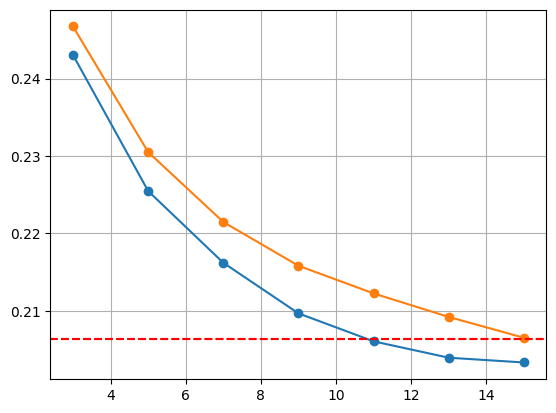

In [27]:
KNN_modelo(X_train2, y_train2, X_test2, y_test2, 'Adult', param_grid_knn)

## Resultados KNN  

Para el dataset Adults KNN no resulta solvente
- Modelo seleccionado:
> k = 11, pesos = 'uniform'

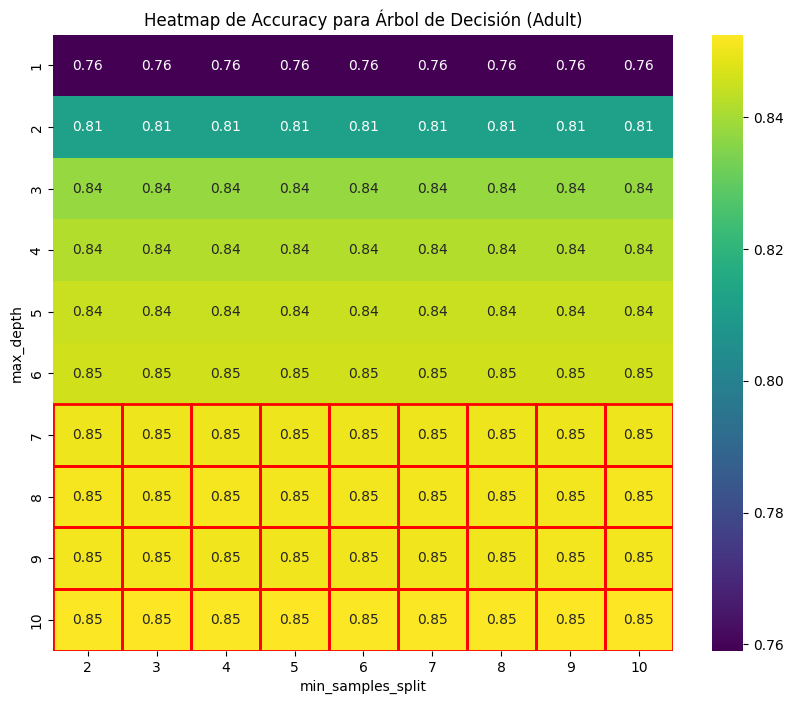

Mejor modelo Árbol según Accuracy: max_depth=10, min_samples_split=10, 
Accuracy=0.8525, Desviación: 0.0063
Mejor modelo Árbol según Regla 1-std: max_depth=7, min_samples_split=2, 
Accuracy=0.8502
Accuracy de test: 0.8574062692071297


In [28]:
DT_modelo(X_train2, y_train2, X_test2, y_test2, 'Adult')

## Modelo Decision Tree:


In [30]:
# Seleccionamos el modelo de Árbol con los parámetros max_depth = 6 y min_samples_split = 2.
final_params_adult = {
    'criterion': 'entropy',
    'max_depth': 6,
    'min_samples_split': 2,
    'random_state': SEMILLA
}
final_model_adult = DecisionTreeClassifier(**final_params_adult)

# Entrenar con el conjunto de entrenamiento
final_model_adult.fit(X2_norm, y2)

print("\nModelo final para Adult entrenado.")

#dataset_validacion_2= pd.read_csv("")
#X2_nuevo = dataset_validacion.drop(columns=['outputClass']) 
#y2_nuevo = dataset_validacion['outputClass'].map({'<=50K': 1, '>50K': 0})

# Evaluación final en el conjunto de test
#y_pred_adult = final_model_adult.predict(X2_nuevo)
#print(f"Accuracy final en test (Adult): {accuracy_score(y2_nuevo, y_pred_adult):.4f}")



Modelo final para Adult entrenado.
